In [43]:
from routing import TaxiRouting, create_dataframes
import pandas as pd

In [56]:
# start, end, start_time, trip_time, value
trips = [(2,1,1,2,1),
         (0,1,0,1,1),
         (0,1,2,1,1)]
# start, end, trip_time
arcs = []
L = 3
trips, nodes, arcs = create_dataframes(trips, arcs, L)
small_ex = TaxiRouting(trips, nodes, arcs, 0, 3, 2)

2


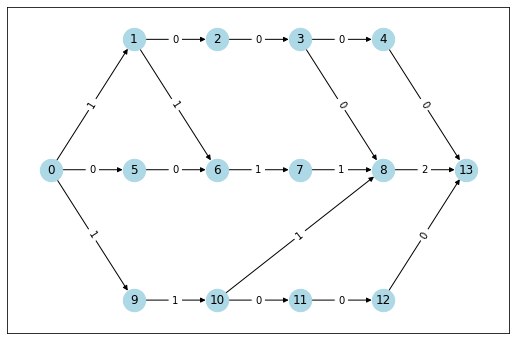

In [57]:
small_ex.optimize()
print(small_ex.objective)
small_ex.draw_graph()

In [63]:
trips = pd.read_csv('data/2013-09-01_trip_data_manhattan.csv').drop(columns='id')
trips['value'] = 2.50 + 1.56*trips.trip_distance + 0.50*trips.trip_time
trips.value = trips.value.apply(lambda x: int(round(x,2)*100))
nodes = pd.read_csv('data/nyc_nodes_manhattan.csv').drop(columns='Unnamed: 0')
arcs = pd.read_csv('data/nyc_links_manhattan.csv').drop(columns='Unnamed: 0')

In [64]:
nyc_taxi = TaxiRouting(trips, nodes, arcs, 1020, 1140, 1700)

In [65]:
nyc_taxi.optimize()
nyc_taxi.objective/100

161816.49

In [66]:
sum(nyc_taxi.trips_df.value)/100

168598.57